## Overview  

The below KNN Model is an assignment from an Udemy Machine Learning class 

https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/?utm_source=adwords&utm_medium=udemyads&utm_campaign=Python_v.PROF_la.EN_cc.US_ti.7380&utm_content=deal4584&utm_term=_._ag_78513466559_._ad_436603254913_._kw__._de_c_._dm__._pl__._ti_dsa-774930046209_._li_9030072_._pd__._&matchtype=b&gclid=Cj0KCQiA9P__BRC0ARIsAEZ6iriN81oGE4RLs6f0zCpoBHxAbJNchYTEvzNHU9QE-cNlYdKRtxqLnAAaAkiaEALw_wcB

## Problem Statement

Given a classified data set, with hidden the feature column names,  but a known target classes; use KNN to create a model that directly predicts a class for a new data point.

## Table of Contents  

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Exploratory Data Analysis](#explore_data)
* [Standardize Values](#standardize)
* [Splitting the data into training and testing sets](#split_data)
* [Create and Train the Model](#train_model)
* [Predictions from our Model](#predict)
* [Evaluation Metrics](#eval_metrics)
* [Choose K Value](#choose_k)


<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="import_data"></a>
## Import Data

In [2]:
df = pd.read_csv("KNN_Project_Data",index_col=0)

In [3]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

Understanding the relationship between the feature attributes and the target variable

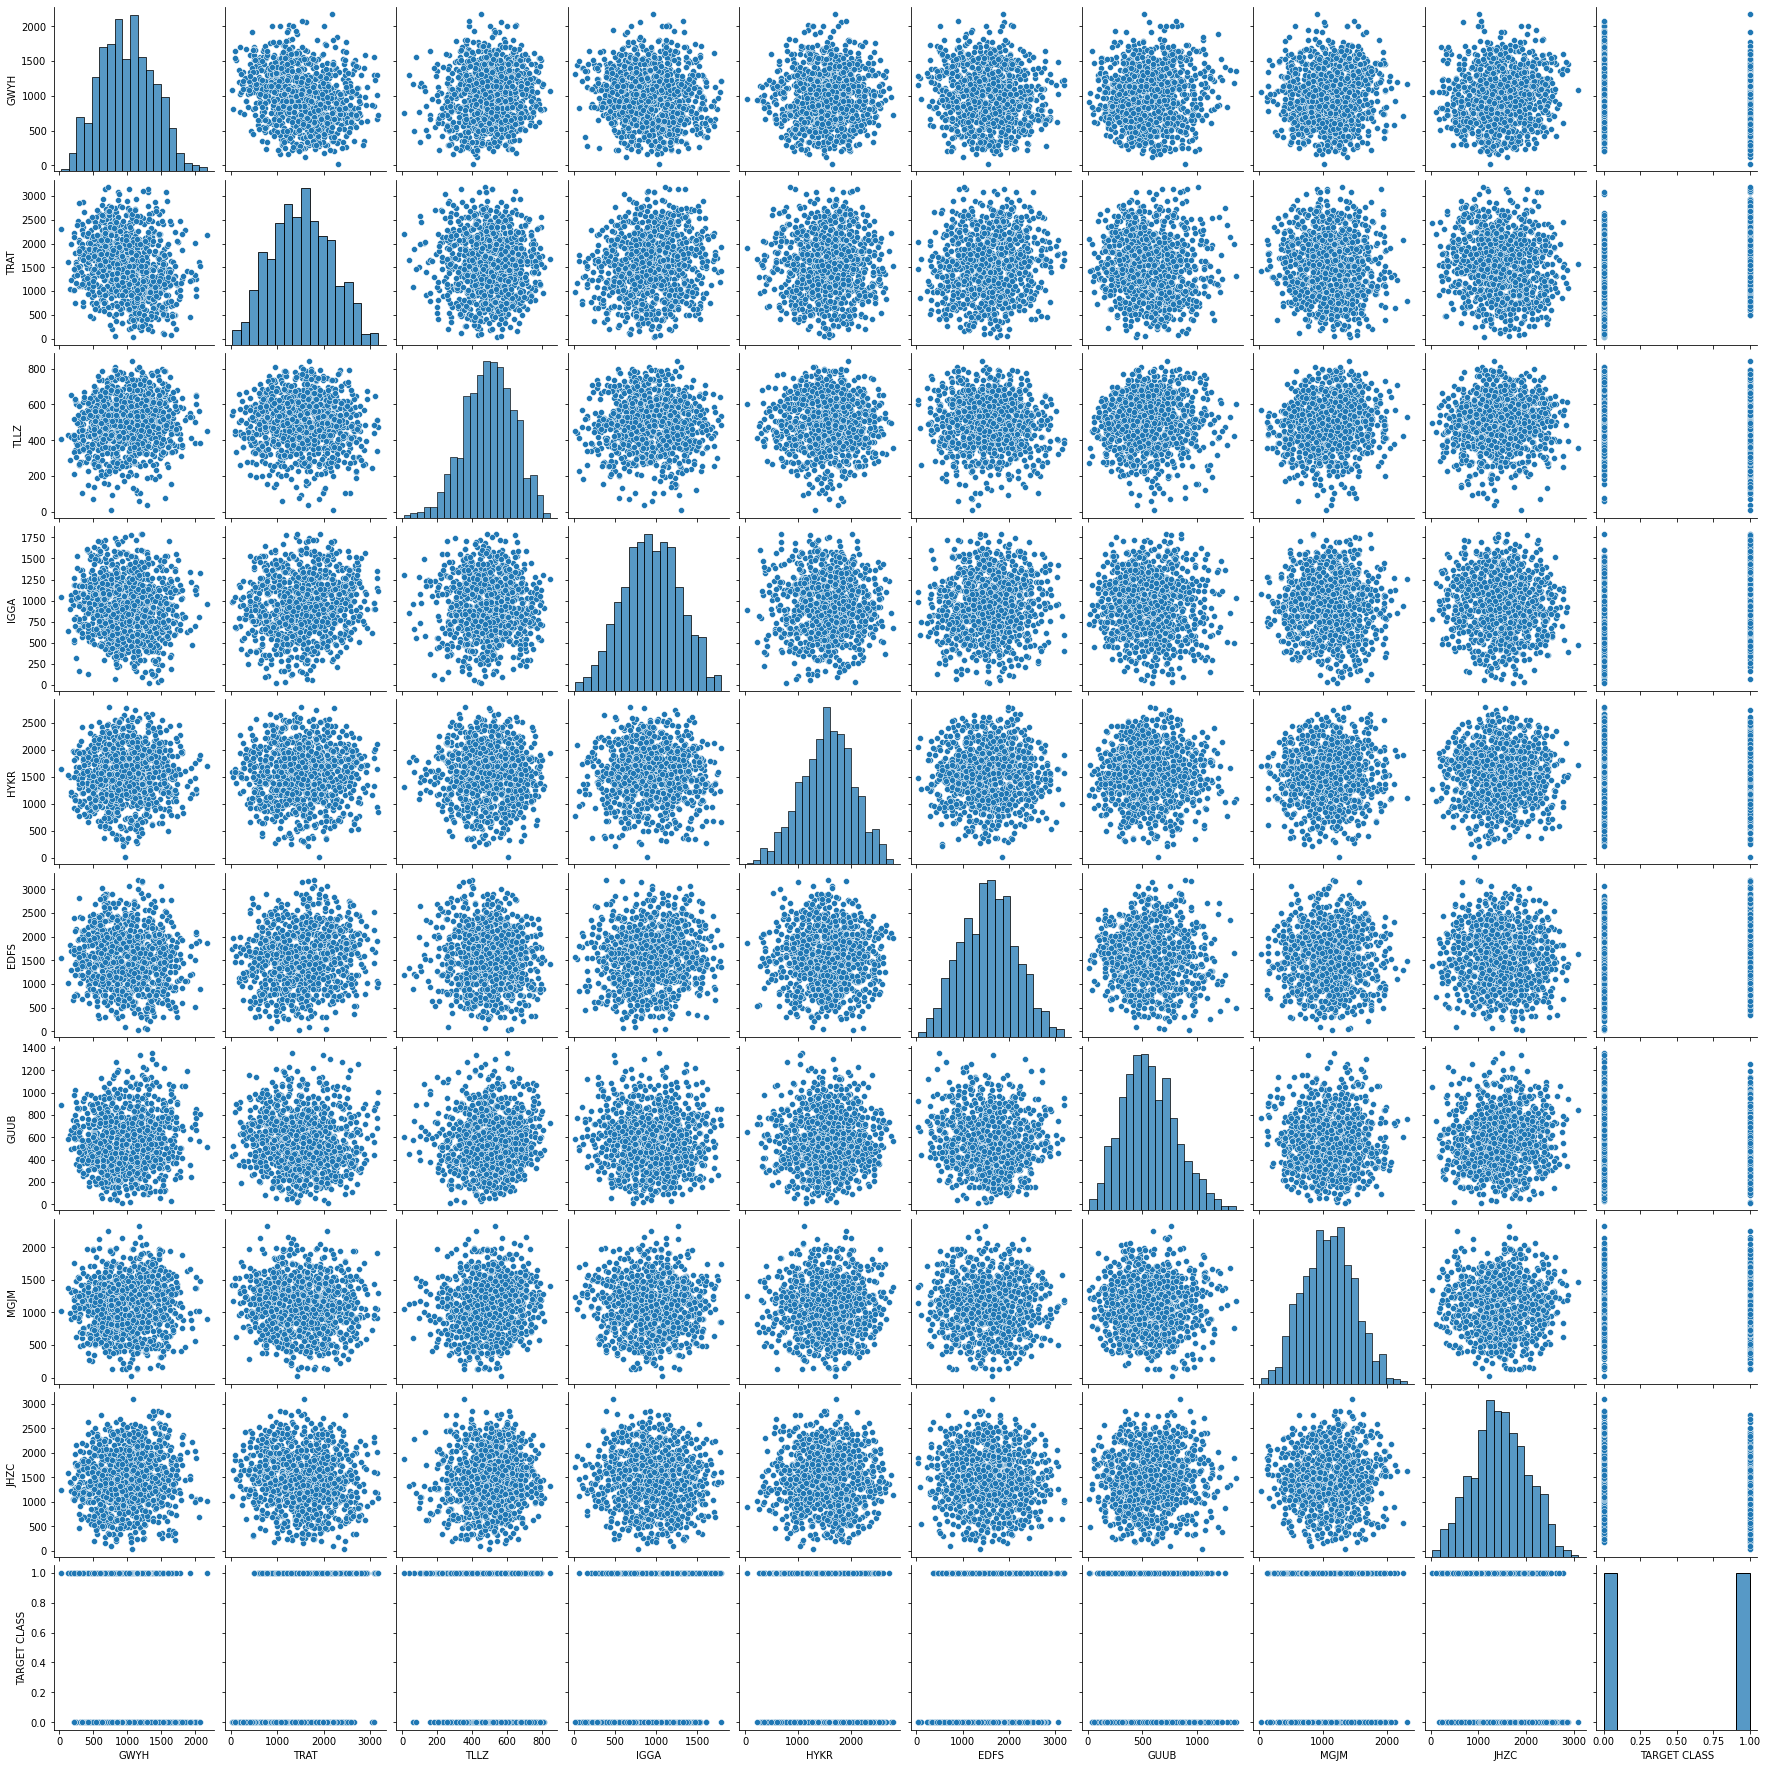

In [4]:
sns.pairplot(df)

<a class="anchor" id="standardize"></a>
## Standardize the Variables

To fit a linear regression model, we select those features which have a high correlation with our target variable; and avoid features that have a high correlation with each other (multicollinearity)

[Keep] High correlation with target variable (MEDV):
    LSTAT: -0.74
    RM: 0.7

[Avoid] High correlation with each other:
    RAD & TAX (0.91)
    DIS & AGE (-0.75)
    


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#create an instance of the scaler
scaler = StandardScaler()

In [8]:
#fit data to the instance of the scaler
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [9]:
#create standardized dataset (perform transformation: standardization by centering and scaling)
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
#create new dataframe, retrieve column names from OG df (so slice 'TARGET CLASS' header off the end)
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
#df_feat.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

Split data into train and test sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#random_state = 5, to tie out to 'towards data science' tutorial
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.3, random_state=101)

<a class="anchor" id="train_model"></a>
## Create and Train the Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
#fit to training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

<a class="anchor" id="predict"></a>
## Predictions from our Model

Fit the model to our Test data, then compare the predictions to the actual values

In [18]:
#pass in data the model hasn't seen before (feature data set of our test data)
predictions = knn.predict(X_test)

<a class="anchor" id="eval_metrics"></a>
## Evaluation Metrics

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))

[[105  47]
 [ 39 109]]


In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       152
           1       0.70      0.74      0.72       148

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



<a class="anchor" id="choose_k"></a>
## Choosing a K Value

In [25]:
#iterate through many models, append error rate to list & plot (vs k-value), to identify optimal k-value to use
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #np.mean(pred_i != y_test)= average error rate, where prediction does not equal test value

Text(0, 0.5, 'Error Rate')

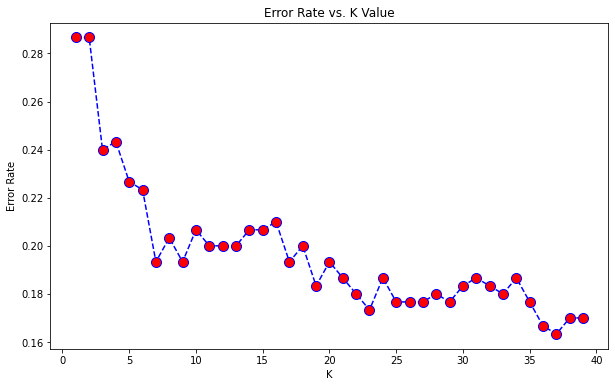

In [26]:
#set size of plot
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
#based on comparison of error rates above, choose optimal k-value and retrain/predict the model
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,predictions))

[[124  28]
 [ 25 123]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       152
           1       0.70      0.74      0.72       148

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

